# Preamble

In [152]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
%matplotlib inline

# Question 6

In [58]:
# searching for for KIC 12254688, a self-lensing WD binary, 
# as observed with TESS, using the search_lightcurve function
# I learned that KIC 12254688's RA and DEC are 289.37382688 and 50.93434074
# so search with these parameters
search_result = lk.search_lightcurve('289.37382688 50.93434074', mission='TESS')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,QLP,1800,299218362,0.0
1,TESS Sector 26,2020,QLP,1800,299218362,0.0


In [51]:
# downloading all the lightcurves, and 
# returns a LightCurveCollection, a container for LightCurve objects
lc_collection = search_result[0:2].download_all()
lc_collection

LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 299218362" SECTOR=14 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    1: <TessLightCurve LABEL="TIC 299218362" SECTOR=26 AUTHOR=QLP FLUX_ORIGIN=sap_flux>

<Figure size 1440x360 with 0 Axes>

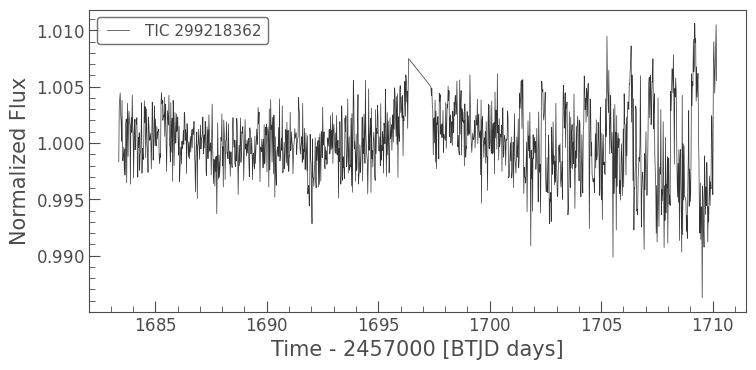

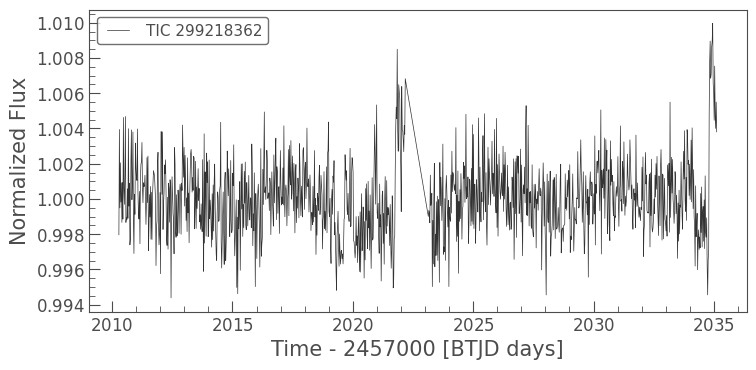

In [55]:
# Create a larger figure for clarity
plt.figure(figsize=(20, 5))
# Plot the light curve collection
for lc in lc_collection:
  lc.normalize().plot();

### We can see the two bumps in the middle of the lightcurves, corresponding to the self-lensing flares.


# Question 7

In [154]:
# Need to find a normal, non-self-lensing object
# KIC 3733346 is an RR Lyrae star
# only download quarter 2 of its lightcurve
search_result_nsl = lk.search_lightcurve('KIC 3733346', author='Kepler', quarter=2)
search_result_nsl

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [263]:
lc_nsl = search_result_nsl.download()
# show theastropy.table that documents flux against time
lc_nsl

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.7659418421681,9.2319516e+04,9.2697735e+00,0,3.263322e-03,781.81123,786.73051,2977,8.9092305e+04,8.8779488e+00,2.0773477e+03,7.0835429e-01,9.2319516e+04,9.2697735e+00,0,———,———,———,———,781.81123,1.2057812e-04,786.73051,1.4581889e-04,1.0092091e-01,-1.9298431e-01
169.7863760557957,8.9214008e+04,9.1563263e+00,0,3.263836e-03,781.80745,786.73005,2978,8.6126133e+04,8.7672691e+00,2.0793108e+03,7.0831001e-01,8.9214008e+04,9.1563263e+00,0,———,———,———,———,781.80745,1.2411721e-04,786.73005,1.5003627e-04,1.0036582e-01,-1.9279599e-01
169.80681006918894,8.5608195e+04,9.0206089e+00,0,3.264349e-03,781.80376,786.72918,2979,8.2681344e+04,8.6362791e+00,2.0772085e+03,7.0797533e-01,8.5608195e+04,9.0206089e+00,0,———,———,———,———,781.80376,1.2850568e-04,786.72918,1.5526263e-04,1.0042009e-01,-1.9289577e-01
169.8272442823436,8.3063625e+04,8.9255180e+00,0,3.264862e-03,781.80081,786.72913,2980,8.0246992e+04,8.5434341e+00,2.0767546e+03,7.0811391e-01,8.3063625e+04,8.9255180e+00,0,———,———,———,———,781.80081,1.3182692e-04,786.72913,1.5920549e-04,1.0021163e-01,-1.9266903e-01
169.84767829527118,8.4244992e+04,8.9700022e+00,0,3.265375e-03,781.80242,786.72905,2981,8.1373969e+04,8.5879698e+00,2.0805510e+03,7.0775980e-01,8.4244992e+04,8.9700022e+00,0,———,———,———,———,781.80242,1.3028238e-04,786.72905,1.5737538e-04,1.0010726e-01,-1.9241102e-01
169.86811250773462,9.7360805e+04,9.4567146e+00,0,3.265888e-03,781.81441,786.73210,2982,9.3887734e+04,9.0560179e+00,2.0782170e+03,7.0836788e-01,9.7360805e+04,9.4567146e+00,0,———,———,———,———,781.81441,1.1529749e-04,786.73210,1.3958653e-04,9.8970458e-02,-1.9224431e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.34491414348304,9.0934453e+04,9.2037315e+00,0,2.595223e-03,781.66006,787.06733,7312,8.6663805e+04,8.7947636e+00,2.1399746e+03,7.0873111e-01,9.0934453e+04,9.2037315e+00,0,———,———,———,———,781.66006,1.2442317e-04,787.06733,1.4701700e-04,-5.1297914e-02,1.4743482e-01


In [259]:
# the class
class BumpLightCurve():
    def __init__(self, lc, bump_ratio = 0.1):
        assert isinstance(lc_nsl, lightkurve.LightCurve), "lc should be a lightkurve.LightCurve object"
        self.lc = lc
        self.bump_ratio = bump_ratio
    
    def add_bump(self):
        
        # to obtain mean flux, isolate the flux and time values first
        lc_flux = self.lc["flux"]
        lc_time = self.lc["time"]
        lc_flux_mean = scipy.mean(lc_flux)
        
        # create a new copy of self.lc as a lightkurve.LightCurve object 
        # to store the bumped data
        bump_lc = self.lc.copy()
        
        # find the index of a random entry of the time array
        lc_time_random = np.random.choice(lc_time)
        index_time_random = int(np.where(lc_time == lc_time_random)[0])
        
        # modify the entry selected by 
        # adding a bump of bump_ratio of the average flux
        bump_lc["flux"][index_time_random] += lc_flux_mean * self.bump_ratio
        
        # put new lightcurve under the instance as an attribute
        self.bump_lc = bump_lc
        
        return bump_lc
        
    
    def plot_bump(self):
        # plotting the old lightcurve 
        plt.figure()
        self.lc.plot()
        plt.title("Original LightCurve")
        plt.show()
        
        # plotting the new lightcurve 
        plt.figure()
        self.bump_lc.plot()
        plt.title("Modified LightCurve")
        plt.show()


In [264]:
bump_instance = BumpLightCurve(lc_nsl, 0.5)


In [265]:
bump_instance.add_bump()


/var/folders/pm/htjwb3gx235c3lr_m_kztdqw0000gn/T/ipykernel_62368/3974714693.py:13: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  lc_flux_mean = scipy.mean(lc_flux)


time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.7659418421681,9.2319516e+04,9.2697735e+00,0,3.263322e-03,781.81123,786.73051,2977,8.9092305e+04,8.8779488e+00,2.0773477e+03,7.0835429e-01,9.2319516e+04,9.2697735e+00,0,———,———,———,———,781.81123,1.2057812e-04,786.73051,1.4581889e-04,1.0092091e-01,-1.9298431e-01
169.7863760557957,8.9214008e+04,9.1563263e+00,0,3.263836e-03,781.80745,786.73005,2978,8.6126133e+04,8.7672691e+00,2.0793108e+03,7.0831001e-01,8.9214008e+04,9.1563263e+00,0,———,———,———,———,781.80745,1.2411721e-04,786.73005,1.5003627e-04,1.0036582e-01,-1.9279599e-01
169.80681006918894,8.5608195e+04,9.0206089e+00,0,3.264349e-03,781.80376,786.72918,2979,8.2681344e+04,8.6362791e+00,2.0772085e+03,7.0797533e-01,8.5608195e+04,9.0206089e+00,0,———,———,———,———,781.80376,1.2850568e-04,786.72918,1.5526263e-04,1.0042009e-01,-1.9289577e-01
169.8272442823436,8.3063625e+04,8.9255180e+00,0,3.264862e-03,781.80081,786.72913,2980,8.0246992e+04,8.5434341e+00,2.0767546e+03,7.0811391e-01,8.3063625e+04,8.9255180e+00,0,———,———,———,———,781.80081,1.3182692e-04,786.72913,1.5920549e-04,1.0021163e-01,-1.9266903e-01
169.84767829527118,8.4244992e+04,8.9700022e+00,0,3.265375e-03,781.80242,786.72905,2981,8.1373969e+04,8.5879698e+00,2.0805510e+03,7.0775980e-01,8.4244992e+04,8.9700022e+00,0,———,———,———,———,781.80242,1.3028238e-04,786.72905,1.5737538e-04,1.0010726e-01,-1.9241102e-01
169.86811250773462,9.7360805e+04,9.4567146e+00,0,3.265888e-03,781.81441,786.73210,2982,9.3887734e+04,9.0560179e+00,2.0782170e+03,7.0836788e-01,9.7360805e+04,9.4567146e+00,0,———,———,———,———,781.81441,1.1529749e-04,786.73210,1.3958653e-04,9.8970458e-02,-1.9224431e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.34491414348304,9.0934453e+04,9.2037315e+00,0,2.595223e-03,781.66006,787.06733,7312,8.6663805e+04,8.7947636e+00,2.1399746e+03,7.0873111e-01,9.0934453e+04,9.2037315e+00,0,———,———,———,———,781.66006,1.2442317e-04,787.06733,1.4701700e-04,-5.1297914e-02,1.4743482e-01


# Question 8

<Figure size 432x288 with 0 Axes>

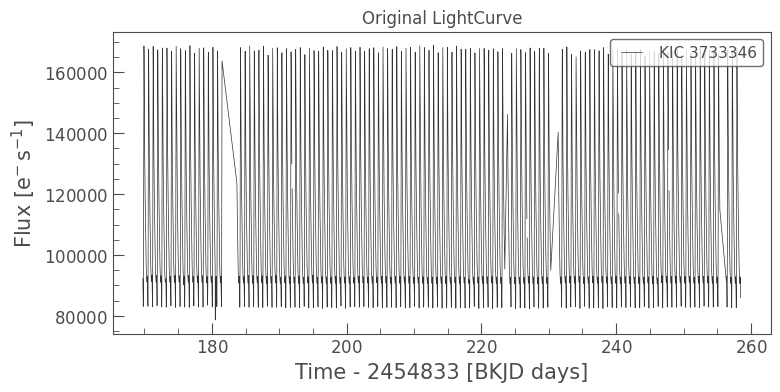

<Figure size 432x288 with 0 Axes>

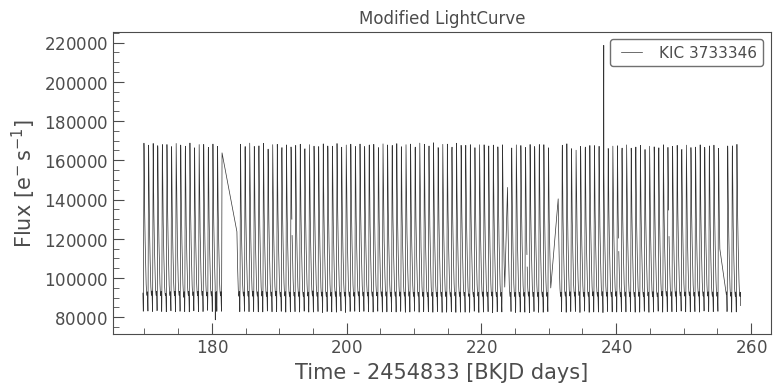

In [266]:
bump_instance.plot_bump()